# Devoir 1 - Vérification de code

### A) Simplifier et établir le problème stationnaire: 

##### a. Préciser de quel type est le problème résultant en stationnaire (c’est-à-dire parabolique, hyperbolique ou elliptique, mixte)

**Réponse :** 
Équation de base:

$$\frac{\partial C}{\partial t} = D_{eff} \nabla^2 C - S$$

Pour un problème stationnaire, l'équation ne dépends pas sur le temps donc $\frac{\partial C}{\partial t} = 0$

Notre équation deviens donc: 

$$ 0= D_{eff} \nabla^2 C - S \iff S = D_{eff} \nabla^2 C$$

##### b. Préciser votre choix de système de coordonnées

**Réponse :** 
    
On utilise un système de coordonnées *cylindrique*: $$C(r,\theta, z)$$



##### c. Réduire au maximum la dimensionnalité du problème (c-à-d appliquer les simplifications de circonstances), préciser l’existence ou non de symétrie dans le domaine et justifier vos choix

**Réponse :** 

**Simplifications**

1- Hauteur infinie $\rightarrow$ le probleme ne depends pas de la hauteur $z$

2- Symetrie radiale $\rightarrow$ le probleme ne depends pas de l'angle $\theta$

Notre probleme est donc en $1D$, et ne depends que du rayon $r$: 

$$C(r)$$



##### d. Présenter en conséquence une discrétisation du domaine en Ntot=5 nœuds (faire un schéma et montrer la position exacte de tous les nœuds sur le rayon). Préciser la taille des intervalles Δr choisis

**Réponse :** 

Rayon $R = \frac{D}2 = 0.5 m$

Noeuds $N = 5$

donc $Δr = \frac{0.5}5 = 0.125m$

Ci-dessus se trouve le schéma de la discrétisation:
    



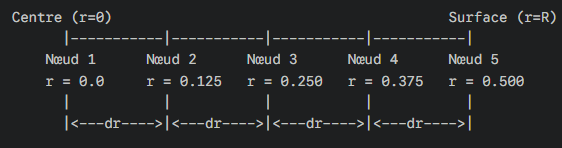

In [141]:
import os 
import warnings
from IPython.display import display, Image


warnings.filterwarnings('ignore') 
display(Image(filename=os.getcwd() + '\images\schema_discret.png', width=600))

##### e. D’après l’énoncé, préciser:
* les conditions frontières (et leurs types) nécessaires à la résolution du problème;

* la condition initiale requise, si nécessaire

**Réponse :** 
    
2 conditions fontières sont nécéssaires pour la résolution du problème: 

1- À $r = 0.5$: Condition de Drichlet, avec $$\left. C \right|_{r=0.5} = C_e$$

2-  À $r = 0$: Condition de Neumann, avec $$\left. \frac{\partial C}{\partial r} \right|_{r=0} = 0$$

En régime stationnaire, le problème ne requiert pas de conditions initiales.


### B) Résoudre analytiquement en considérant les conditions frontières choisies et obtenir le profil de concentration à l’état stationnaire :

##### a. Spécifiquement, montrer que le profil de concentration en sel est de forme quadratique et s’écrit comme:

$C(r) = \frac{1}{4}\,\frac{S}{D_{\mathrm{eff}}}\,R^{2}
\left(\frac{r^{2}}{R^{2}} - 1\right) + C_{e}$


**Réponse :** 
    
Notons que puisque le problème est stationnaire et en 1D selon le rayon, comme mentionné dans les réponses de la question A, l'équation a résoudre est la suivante :

$\frac{\partial C}{\partial t} = {D_{\mathrm{eff}}}\nabla^2 C - S \Longrightarrow \frac{d}{dr}\!\left(r\,\frac{dC}{dr}\right)
= \frac{S}{D_{\mathrm{eff}}} r$

Avec comme condition frontière :
$\left.\frac{dC}{dr}\right|_{r=0} = 0, \quad C(R) = C_e$

Voici donc les étapes afin d'arriver à la solution analytique :

* Application de la première intégration

$\int \frac{d}{dr}\!\left(r\,\frac{dC}{dr}\right)\, dr = \int \frac{S}{D_{\mathrm{eff}}}\, r\, dr \Longrightarrow r \frac{dC}{dr} = \frac{S}{2 D_{\mathrm{eff}}} r^2 + A$

* Application de la condition de Neumann de symétrie

La seule valeur possible que la constante $A$ peut prendre dans le cas de la condition de Neumann $\left.\frac{dC}{dr}\right|_{r=0} = 0$ est $A = 0$. Ainsi, l'équation après application de cette dernière devient :

$r \frac{dC}{dr} = \frac{S}{2 D_{\mathrm{eff}}} r^2 \Longrightarrow \frac{dC}{dr} = \frac{S}{2 D_{\mathrm{eff}}} r$

* Application de la deuxième intégration

$\int \frac{dC}{dr}\, dr = \int \frac{S}{2 D_{\mathrm{eff}}} r \, dr \Longrightarrow C(r) = \frac{S}{4 D_{\mathrm{eff}}} r^2 + B$

* Application de la condition de Dirichlet

La valeur de $B$ obtenu après l'application de la condition frontière de Dirichlet $C(R) = C_e$ est :

$B = C_e - \frac{S}{4 D_{\mathrm{eff}}} R^2$

* Obtention de la solution finale

La solution finale est donc :

$ C(r) =\frac{S}{4 D_{\mathrm{eff}}} r^2 - \frac{S}{4 D_{\mathrm{eff}}} R^2 + C_e \Longrightarrow C(r) =\frac{S}{4 D_{\mathrm{eff}}}R^2 (\frac{r^2}{R^2} - 1) + C_e$


### C) En donnant suffisamment de détails et vous basant sur les diapos du rappel concernant les différences finies (cf. Moodle - diapo 4), approximer l’Éq. (1) à l’état stationnaire, avec un termesource constant, et les conditions frontières appropriées par les schémas de différenciation suivants en espace :

$\left.\frac{\partial C}{\partial r}\right|_{i}
= \frac{C_{i+1}-C_i}{\Delta r},
\qquad
\left.\frac{\partial^2 C}{\partial r^2}\right|_{i}
= \frac{C_{i+1}-2C_i+C_{i-1}}{\Delta r^2}$

##### a. Préciser l’équation obtenue en chacun des nœuds (incluant les nœuds frontières)

**Réponse :** 

Avant d'implémenter les schémas de différenciation, il faut isoler nos termes de dérivées. Pour ce faire, il faut prendre l'équation (1) simplifiée et utiliser la première propriété donnée par Mme D'avignon.

$\frac{1}{r}\frac{d}{dr}\!\left(r\,\frac{dC}{dr}\right) = \frac{S}{D_{\mathrm{eff}}} \Longrightarrow \frac{d^2C}{dr^2} + \frac{1}{r}\frac{dC}{dr} = \frac{S}{D_{\mathrm{eff}}}$


On peut maintenant implémenter les schémas de différenciation. Voici les équations obtenues pour chaque noeud :

**Noeud 1** : Ce noeud est un noeud frontière puisqu'il se trouve à $r = 0$. On y applique donc la condition frontière de symétrie :

$\left.\frac{dC}{dr}\right|_{r=0} = 0 \Longrightarrow \left.\frac{dC}{dr}\right|_{i=1} = \frac{C_{i+1}-C_i}{\Delta r} = 0$

Pour $i=1$ l'équation devient donc :

$\frac{C_{2}-C_1}{\Delta r} = 0 \Longrightarrow C_{2} - C_{1} = 0$

**Noeud 2, 3, 4** : Ces noeuds sont des noeuds intermédiaires. On applique donc l'équation trouvé après simplification et après l'application de la propriété de dérivé de multiplication :

$\left.\frac{d^2C}{dr^2}\right|_{i} + \left.\frac{1}{r}\frac{dC}{dr}\right|_{i} = \frac{S}{D_{\mathrm{eff}}} \Longrightarrow \frac{C_{i+1} - 2C_i + C_{i-1}}{\Delta r^2} + \frac{1}{r_i}\frac{C_{i+1} - C_i}{\Delta r} = \frac{S}{D_{\mathrm{eff}}} \Longrightarrow (1+\frac{\Delta r}{r_i}) C_{i+1} + (\frac{\Delta r}{r_i} - 2) C_i + C_{i-1} = \frac{S\Delta r^2}{D_{\mathrm{eff}}}$

Pour $i=2$ l'équation devient donc :

$(1+\frac{\Delta r}{r_2}) C_{3} + (\frac{\Delta r}{r_2} - 2) C_2 + C_{1} = \frac{S\Delta r^2}{D_{\mathrm{eff}}}$

Pour $i=3$ l'équation devient donc :

$(1+\frac{\Delta r}{r_3}) C_{4} + (\frac{\Delta r}{r_3} - 2) C_3 + C_{2} = \frac{S\Delta r^2}{D_{\mathrm{eff}}}$

Pour $i=4$ l'équation devient donc :

$(1+\frac{\Delta r}{r_4}) C_{5} + (\frac{\Delta r}{r_4} - 2) C_4 + C_{3} = \frac{S\Delta r^2}{D_{\mathrm{eff}}}$

**Noeud 5** : Ce noeud est un noeud frontière puisqu'il se trouve à $r = R$. On y applique donc la condition frontière de Dirichlet :

$\left.C\right|_{r=R} = C_e \Longrightarrow \left.C\right|_{i=5} = C_e$

Pour $i=5$ l'équation devient donc :

$C_5 = C_e$

##### b. Préciser la procédure générale pour résoudre le problème

**Réponse :** 

Le problème est un problème à N inconnu et N équations. Ainsi, il peut être résolu à l'aide d'un simple système matriciel :

$\mathbf{A}\mathbf{x}=\mathbf{b},\qquad \mathbf{x} = \{x_1, x_2, \dots, x_n\}$

Le vecteur $\mathbf{x}$ dans ce cas représente la concentration de sel à tous les points de notre domaine.


##### c. Préciser l’erreur de troncature et donc l’ordre de précision attendu du schéma global

**Réponse :** 

TODO : Mettre le developpement de taylor pour chaque variable
    
Pour le premier schéma de discrétisation de la simple dérivé $\left.\frac{\partial C}{\partial r}\right|_{i} = \frac{C_{i+1}-C_i}{\Delta r}$, voici le développement de taylor :

$\frac{C_{i+1}-C_i}{\Delta r} = \frac{\partial C}{\partial r}(r_i)+ \frac{\Delta r}{2}\frac{\partial^2 C}{\partial r^2}(r_i)+ \mathcal{O}(\Delta r^2)$

Ce dernier est donc d'ordre 1, puisque le plus petit exposant de ${\Delta r}$ est de 1.

Pour le deuxième schéma de discretisation de la dérivé seconde $\left.\frac{\partial^2 C}{\partial r^2}\right|_{i}= \frac{C_{i+1}-2C_i+C_{i-1}}{\Delta r^2}$, voici le développement de taylor :

$\frac{C_{i+1}-2C_i+C_{i-1}}{\Delta r^2}=\frac{d^2 C}{d r^2}(r_i)+\frac{\Delta r^2}{12}
\frac{d^4 C}{d r^4}(r_i)+\mathcal{O}(\Delta r^4)$

Ce dernier est donc d'ordre 2, puisque le plus petit exposant de ${\Delta r}$ est de 2.

En ce qui concerne l'ordre du schéma global, il sera de 1, car quand ${\Delta r}$ tend vers 0, c'est l'erreur d'ordre 1 qui va dominer l'erreur d'ordre 2.

### D) Écrire un code de calcul générique (c-à-d pour un Ntot non précisé d’avance) pour résoudre l’Éq. (1) (à l’état stationnaire et avec S constant), puis :

##### a. Tracer le profil de concentration obtenu à l’état stationnaire et comparer le à la solution analytique (Eq.(2)) - préciser clairement tous les paramètres de la simulation utilisés

**Réponse :** 
    


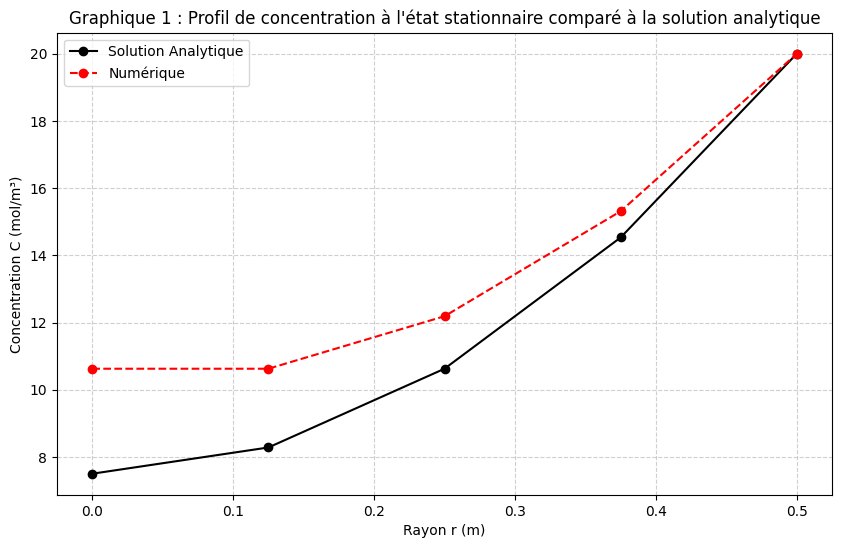

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from module import solve_finite_difference, solution_analytique

N_sim = 5  # Nombre de nœuds pour le tracé

# Calcul de la solution numérique et analytique
r, C = solve_finite_difference(N_sim, schema='D')
C_ana = solution_analytique(r)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(r, C_ana, 'k-', linewidth=1.5, label='Solution Analytique', marker="o")
plt.plot(r, C, 'r--', label=f'Numérique', marker="o")

plt.title("Graphique 1 : Profil de concentration à l'état stationnaire comparé à la solution analytique")
plt.xlabel("Rayon r (m)")
plt.ylabel("Concentration C (mol/m³)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



##### b. Faire une vérification du code appropriée comme vu en classe, en utilisant la solution analytique (Eq.(2)). Entre autres, mais pas seulement, tracer sur un même graphique les erreurs L1, L2 et L∞

**Réponse :** 
    

Ordre L1 : 1.00
Ordre L2 : 1.00
Ordre Linf : 1.00


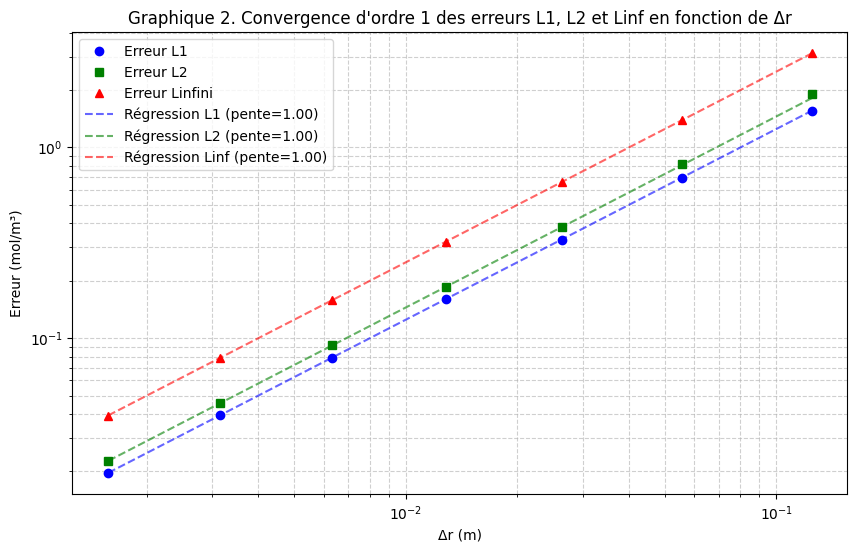

In [13]:
N_values = [5, 10, 20, 40, 80, 160, 320]  # Différents nombres de nœuds
R = 0.5
L1_errors = []
L2_errors = []
Linf_errors = []
dr_array=[]

for N in N_values:
    r_num, C_num = solve_finite_difference(N, schema='D')
    C_ana = solution_analytique(r_num)
    
    # Calcul des erreurs
    L1 = np.mean(np.abs(C_num - C_ana))
    L2 = np.sqrt(np.mean((C_num - C_ana)**2))
    Linf = np.max(np.abs(C_num - C_ana))
    
    L1_errors.append(L1)
    L2_errors.append(L2)
    Linf_errors.append(Linf)
    dr_array.append(R / (N - 1))  # Calcul du dr pour chaque N


err_L1_array = np.array(L1_errors)
err_L2_array = np.array(L2_errors)
err_Linf_array = np.array(Linf_errors)




# Régression linéaire sur les trois premiers points (delta r le plus petit) pour estimer l'ordre de convergence
ordre_L1, ord_L1 = np.polyfit(np.log(dr_array[-3:]), np.log(err_L1_array[-3:]), 1)
ordre_L2, ord_L2 = np.polyfit(np.log(dr_array[-3:]), np.log(err_L2_array[-3:]), 1)
ordre_Linf, ord_Linf = np.polyfit(np.log(dr_array[-3:]), np.log(err_Linf_array[-3:]), 1)

#Droites de regression pour visualiser les ordres de convergence
droite_L1 = np.exp(ord_L1) * (dr_array ** ordre_L1)
droite_L2 = np.exp(ord_L2) * (dr_array ** ordre_L2)
droite_Linf = np.exp(ord_Linf) * (dr_array ** ordre_Linf)

print(f"Ordre L1 : {ordre_L1:.2f}")
print(f"Ordre L2 : {ordre_L2:.2f}")
print(f"Ordre Linf : {ordre_Linf:.2f}")

#Graphique de convergence
plt.figure(figsize=(10, 6))
plt.loglog(dr_array, L1_errors, 'bo', label='Erreur L1')
plt.loglog(dr_array, L2_errors, 'gs', label='Erreur L2')
plt.loglog(dr_array, Linf_errors, 'r^', label='Erreur Linfini')

plt.loglog(dr_array, droite_L1, 'b--', alpha=0.6, label=f'Régression L1 (pente={ordre_L1:.2f})')
plt.loglog(dr_array, droite_L2, 'g--', alpha=0.6, label=f'Régression L2 (pente={ordre_L2:.2f})')
plt.loglog(dr_array, droite_Linf, 'r--', alpha=0.6, label=f'Régression Linf (pente={ordre_Linf:.2f})')

plt.title("Graphique 2. Convergence d'ordre 1 des erreurs L1, L2 et Linf en fonction de Δr")
plt.xlabel("Δr (m)")
plt.ylabel("Erreur (mol/m³)")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### E) Remplacer maintenant les schémas de différenciation précédents par ceux-ci et les implanter dans votre code :

$\left.\frac{\partial C}{\partial r}\right|_{i}
= \frac{C_{i+1}-C_{i-1}}{2\,\Delta r},
\qquad
\left.\frac{\partial^2 C}{\partial r^2}\right|_{i}
= \frac{C_{i+1}-2C_i+C_{i-1}}{\Delta r^2}$



##### a. Préciser l’erreur de troncature et donc l’ordre de précision attendu de ce nouveau schéma global

**Réponse :** 
    
Si on fait un développement de Taylor du nouveau terme $\left.\frac{\partial C}{\partial r}\right|_{i}= \frac{C_{i+1}-C_{i-1}}{2\,\Delta r}$, on trouve :

$$
\frac{C_{i+1}-C_{i-1}}{2\Delta r}
=
\frac{dC}{dr}(r_i)
+
\frac{\Delta r^2}{6}
\frac{d^3C}{dr^3}(r_i)
+
\mathcal{O}(\Delta r^4)
$$

L’erreur de troncature est donc d’ordre $\mathcal{O}(\Delta r^2)$.

Pour la dérivée seconde, le développement de Taylor donne :

$$
\frac{C_{i+1}-2C_i+C_{i-1}}{\Delta r^2}
=
\frac{d^2C}{dr^2}(r_i)
+
\frac{\Delta r^2}{12}
\frac{d^4C}{dr^4}(r_i)
+
\mathcal{O}(\Delta r^4)
$$

L’erreur de troncature est également d’ordre $\mathcal{O}(\Delta r^2)$.

Finalement, on peut en déduire que le schéma est d'ordre 2.




##### b. Refaire les vérifications

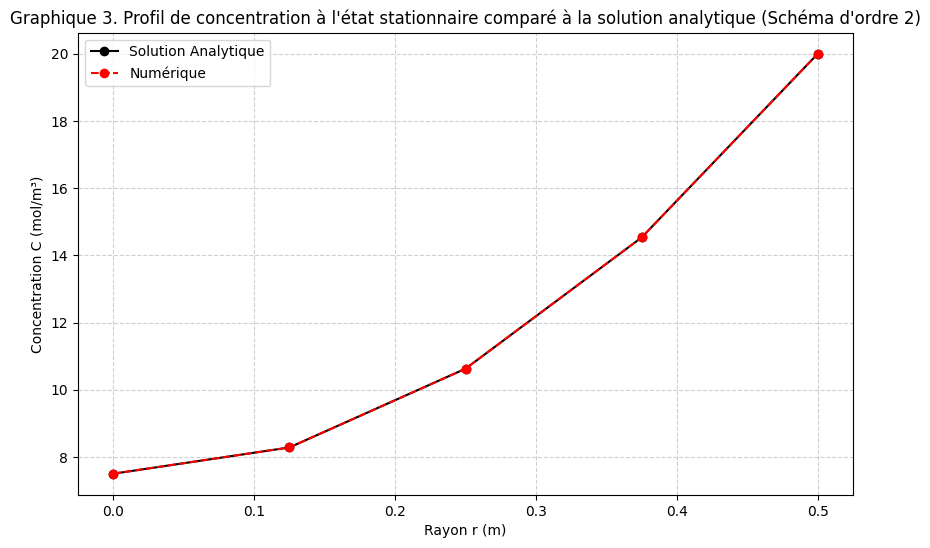

In [15]:
N_sim = 5  # Nombre de nœuds pour le tracé

#Appel des fonctions du fichier module.py
r_num, C_num = solve_finite_difference(N_sim, schema='E')
C_ana = solution_analytique(r_num)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(r_num, C_ana, 'k-', linewidth=1.5, label='Solution Analytique', marker="o")
plt.plot(r_num, C_num, 'r--', label=f'Numérique', marker="o")

plt.title("Graphique 3. Profil de concentration à l'état stationnaire comparé à la solution analytique (Schéma d'ordre 2)")
plt.xlabel("Rayon r (m)")
plt.ylabel("Concentration C (mol/m³)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


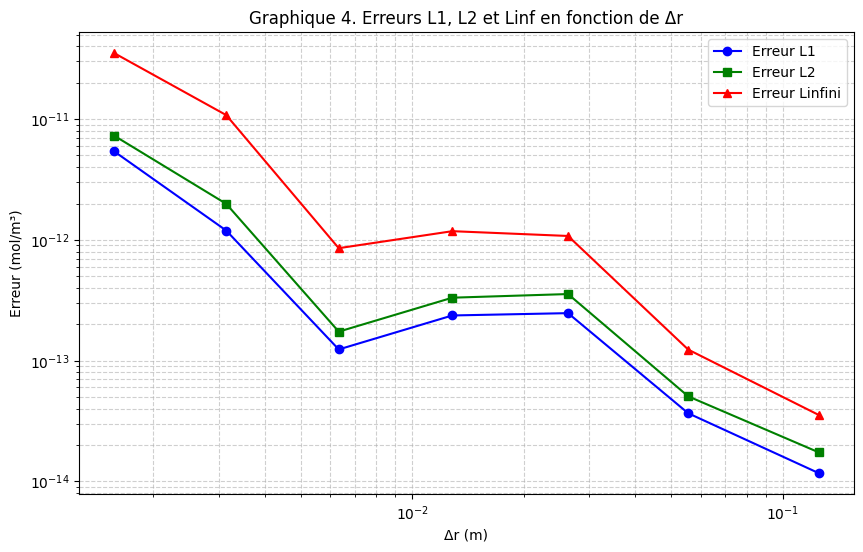

In [24]:
from module import solve_finite_difference, solution_analytique

R = 0.5
N_values = [5, 10, 20, 40, 80, 160, 320]  # Différents nombres de nœuds
L1_errors = []
L2_errors = []
Linf_errors = []
dr_array=[]

# Calcul des erreurs pour différents N
for N in N_values:
    r_num, C_num = solve_finite_difference(N, schema='E')
    C_ana = solution_analytique(r_num)
    
    # Calcul des erreurs
    L1 = np.mean(np.abs(C_num - C_ana))
    L2 = np.sqrt(np.mean((C_num - C_ana)**2))
    Linf = np.max(np.abs(C_num - C_ana))
    
    L1_errors.append(L1)
    L2_errors.append(L2)
    Linf_errors.append(Linf)
    dr_array.append(R / (N - 1))  


err_L1_array = np.array(L1_errors)
err_L2_array = np.array(L2_errors)
err_Linf_array = np.array(Linf_errors)

# Graphiques 
plt.figure(figsize=(10, 6))
plt.loglog(dr_array, L1_errors, 'bo-', label='Erreur L1')
plt.loglog(dr_array, L2_errors, 'gs-', label='Erreur L2')
plt.loglog(dr_array, Linf_errors, 'r^-', label='Erreur Linfini')

plt.title("Graphique 4. Erreurs L1, L2 et Linf en fonction de Δr")
plt.xlabel("Δr (m)")
plt.ylabel("Erreur (mol/m³)")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

##### c. Tracer les profils de concentration obtenus avec les deux schémas numériques (questions C/D et E) et comparer à la solution analytique (question B)

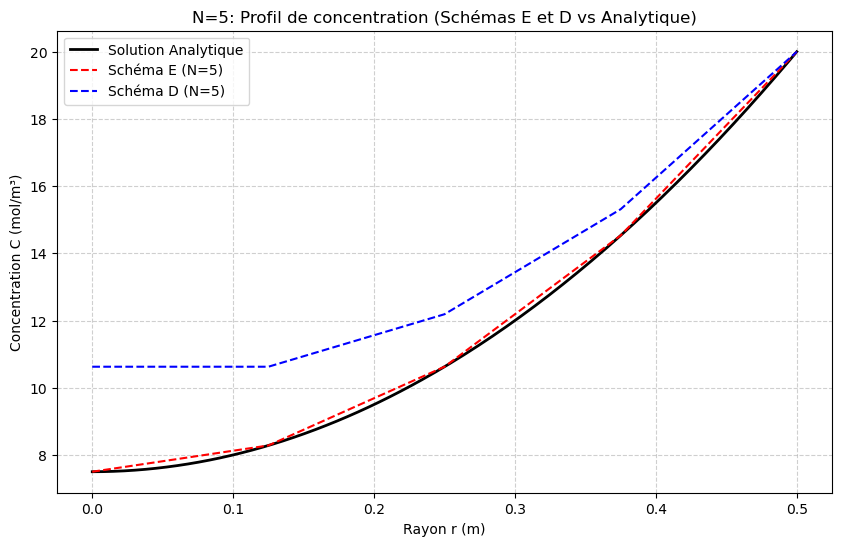

In [159]:

N_sim = 5  # Nombre de nœuds pour le tracé

# Solution numérique schéma E
r_E, C_E = solve_finite_difference(N_sim, schema='E')

# Solution numérique schéma D
r_D, C_D = solve_finite_difference(N_sim, schema='D')

# Solution analytique pour tracé lisse
r_ana = np.linspace(0, 0.5, 200)
C_ana = solution_analytique(r_ana)

# Graphique comparatif
plt.figure(figsize=(10, 6))
plt.plot(r_ana, C_ana, 'k-', linewidth=2, label='Solution Analytique')
plt.plot(r_E, C_E, 'r--', label=f'Schéma E (N={N_sim})')
plt.plot(r_D, C_D, 'b--', label=f'Schéma D (N={N_sim})')

plt.title("N=5: Profil de concentration (Schémas E et D vs Analytique)")
plt.xlabel("Rayon r (m)")
plt.ylabel("Concentration C (mol/m³)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

##### d. Que constatez-vous maintenant ? Comment expliquer le résultat obtenu ?

**Réponse :** 

Bien que les ordres de convergence observés semblent diverger de l'ordre théorique du schéma, on constate que les erreurs absolues atteignent le seuil de la précision machine ($\sim 10^{-14}$). À ce niveau de résolution, l'erreur de troncature mathématique est devenue inférieure au bruit numérique produit par l'ordinateur. La régression calculée ne représente donc pas la convergence du schéma, mais l'accumulation des erreurs d'arrondi aléatoires. Par conséquent, le schéma est considéré comme validé, puisqu'il atteint la limite de précision physique de l'environnement de calcul. 